# `geom_band()`

In [1]:
from lets_plot import *


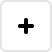
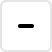
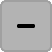
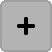
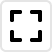
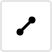
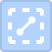
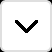
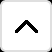
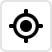
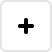
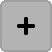
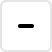
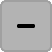
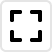
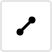
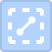
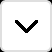
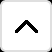
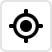

In [2]:
LetsPlot.setup_html()

## Default

In [3]:
ggplot() + geom_band(xmin=-1, xmax=1)

## Both vertical and horizontal

In [4]:
ggplot() + \
    geom_band(aes(
        xmin=[-1.5, .5],
        xmax=[-.5, 1.5],
    )) + \
    geom_band(aes(
        ymin=[-1.5, .5],
        ymax=[-.5, 1.5],
    ))

## Additional parameters

In [5]:
ggplot() + \
    geom_band(aes(
        xmin=[-1, 0],
        xmax=[0, 1],
        fill=["a", "b"],
    ), size=0, alpha=.5)

## Tooltips

In [6]:
data = {
    'xstart': [ 0,  2,  3,    6, None],
    'xend':   [ 1,  4,  5,    7, None],
    'y_from': [-1, -4, -5, None,   -9],
    'y_to':   [ 0, -2, -3, None,   -8],
    'color':  ["black", "red", "blue", "green", "yellow"],
}

p1 = ggplot(data, aes(xmin='xstart', xmax='xend'))
p2 = ggplot(data, aes(ymin='y_from', ymax='y_to'))

gggrid([
    p1 + geom_band(aes(fill='color'), alpha=.2) + scale_fill_identity(),
    p2 + geom_band(aes(fill='color'), alpha=.2) + scale_fill_identity(),
    p1 + geom_band(tooltips='none'),
    p1 + geom_band(tooltips=layer_tooltips().line("min|^xmin").line("max|^xmax").line("color|@color")),
], ncol=2)

## Different coordinate systems

In [7]:
limits = [-4.25, 4.25]

p = ggplot({'xmin': [-4, -2.5, -1, 1.5, 3], \
            'xmax': [-3, -1.5, 1, 2.5, 4], \
            'ymin': [-4, -1, 3, None, None], \
            'ymax': [-3, 1, 4, None, None]}) + \
    geom_band(aes(xmin='xmin', xmax='xmax'), alpha=.2, size=0, fill="red") + \
    geom_band(aes(ymin='ymin', ymax='ymax'), alpha=.2, size=0, fill="blue")

gggrid([
    p + ggtitle("Default coord"),
    p + coord_flip(xlim=limits, ylim=limits) + ggtitle("coord_flip()"),
    p + coord_fixed(xlim=limits, ylim=limits) + ggtitle("coord_fixed()"),
    p + coord_polar(xlim=limits, ylim=limits) + ggtitle("coord_polar()"),
], ncol=2)

In [8]:
# See: https://gadflyjl.org/stable/gallery/geometries/#[Geom.band](@ref),-[Geom.hband](@ref),-[Geom.vband](@ref)

import pandas as pd

presidential_df = pd.read_csv("data/presidential.csv", parse_dates=["start", "end"])
economics_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/economics.csv", parse_dates=["date"])

ggplot() + \
    geom_band(aes(xmin="start", xmax="end", fill="party"), data=presidential_df, size=0, alpha=.4) + \
    geom_line(aes("date", "unemploy"), data=economics_df) + \
    scale_y_continuous(trans='log10') + \
    ggsize(1000, 200)